In [1]:
from functions_py import *
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import numpy as np
import numpy.ma as ma

In [2]:
plt.rcParams.update({
    "image.origin": "lower",
    "image.aspect": 1,
    #"text.usetex": True,
    "grid.alpha": .5,
    "axes.linewidth":2,
    "lines.linewidth" : 1,
    "font.size":    15.0,
    "xaxis.labellocation": 'right',  # alignment of the xaxis label: {left, right, center}
    "yaxis.labellocation": 'top',  # alignment of the yaxis label: {bottom, top, center}
    "xtick.top":           True ,  # draw ticks on the top side
    "xtick.major.size":    8    ,# major tick size in points
    "xtick.minor.size":    4      ,# minor tick size in points
    "xtick.direction":     'in',
    "xtick.minor.visible": True,
    "ytick.right":           True ,  # draw ticks on the top side
    "ytick.major.size":    8    ,# major tick size in points
    "ytick.minor.size":    4      ,# minor tick size in points
    "ytick.direction":     'in',
    "ytick.minor.visible": True,
    "ytick.major.width":   2   , # major tick width in points
    "ytick.minor.width":   1 ,
    "xtick.major.width":   2   , # major tick width in points
    "xtick.minor.width":   1 ,
    "legend.framealpha": 0 ,
    "legend.loc": 'best',

})

# MIT images

## Raw Image

In [3]:
# path='/home/oem/datosFits/testMITLL/spuriousCharge/15FEB23/proc_skp_module24_MITLL01_externalVr-4_Vv2_T140__NSAMP324_NROW650_NCOL700_EXPOSURE0_NBINROW1_NBINCOL1_img79.fits'
# path='/home/oem/datosFits/testMITLL/spuriousCharge/15FEB23/proc_skp_module24_MITLL01_externalVr-4_Vv2_T140__NSAMP324_NROW650_NCOL700_EXPOSURE0_NBINROW1_NBINCOL1_img82.fits'
# path='/home/oem/datosFits/testMITLL/spuriousCharge/15FEB23/proc_skp_module24_MITLL01_externalVr-4_Vv2_T150__NSAMP324_NROW650_NCOL700_EXPOSURE0_NBINROW1_NBINCOL1_img85.fits'
# path='/home/oem/datosFits/testMITLL/spuriousCharge/15FEB23/proc_skp_module24_MITLL01_externalVr-4_Vv2_T160__NSAMP324_NROW650_NCOL700_EXPOSURE0_NBINROW1_NBINCOL1_img88.fits'
# path='/home/oem/datosFits/testMITLL/spuriousCharge/15FEB23/proc_skp_module24_MITLL01_externalVr-4_Vv2_T170__NSAMP324_NROW650_NCOL700_EXPOSURE0_NBINROW1_NBINCOL1_img91.fits'
# path='/home/oem/datosFits/testMITLL/spuriousCharge/15FEB23/proc_skp_module24_MITLL01_externalVr-4_Vv2_T170__NSAMP324_NROW650_NCOL700_EXPOSURE0_NBINROW1_NBINCOL1_img94.fits'
#path='/home/oem/datosFits/testMITLL/16FEB23/spurious/proc_skp_module24_MITLL01_externalVr-4_Vv2_T170__NSAMP324_NROW650_NCOL700_EXPOSURE0_NBINROW1_NBINCOL1_img99.fits'
path='/home/oem/datosFits/testMITLL/spuriousCharge/01Mar23/proc_skp_module24_MITLL01_externalVr-4_Vv2_T140__NSAMP324_NROW650_NCOL700_EXPOSURE0_NBINROW1_NBINCOL1_img23.fits'

Filename: /home/oem/datosFits/testMITLL/spuriousCharge/01Mar23/proc_skp_module24_MITLL01_externalVr-4_Vv2_T140__NSAMP324_NROW650_NCOL700_EXPOSURE0_NBINROW1_NBINCOL1_img23.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     165   (700, 650)   float32   
  1                1 ImageHDU       164   (700, 650)   float32   
  2                1 ImageHDU       164   (700, 650)   float32   
  3                1 ImageHDU       164   (700, 650)   float32   
None
----------------


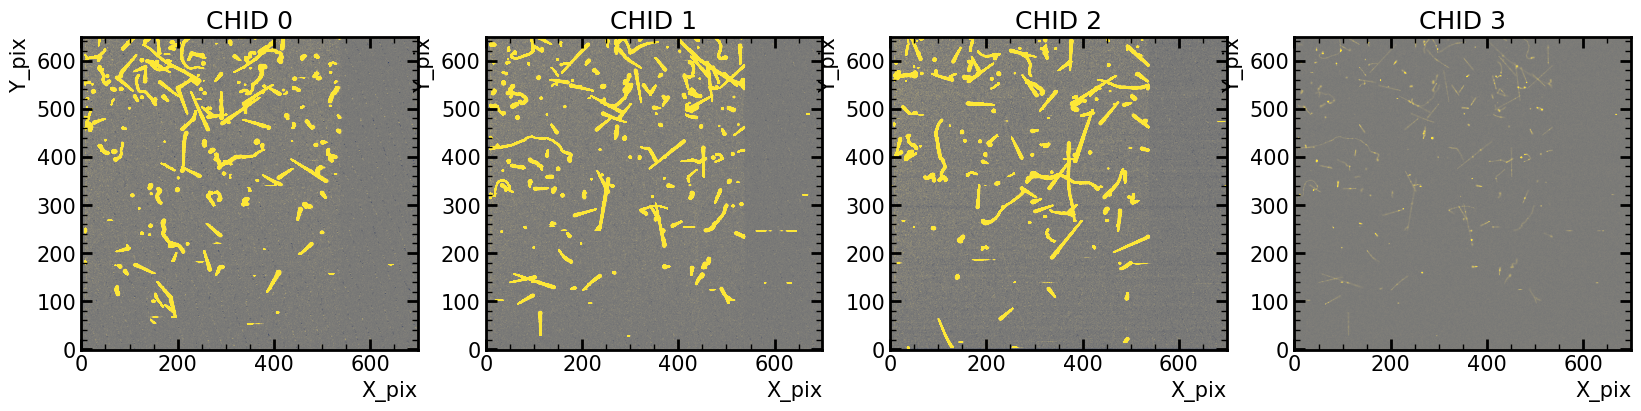

In [4]:
hdu_list = fits.open(path)
print(hdu_list.info())
print('----------------')
# hdu_list[0].header
plt.figure(figsize=(20,8))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(hdu_list[i].data-np.median(hdu_list[i].data),cmap=mpl.cm.cividis, vmin=-800,vmax=800)
    plt.title('CHID '+str(i))
    plt.ylabel('Y_pix')
    plt.xlabel('X_pix')
plt.show()

Error - Xtalk fit failed
Error - Xtalk fit failed
CHID 0 Gain:(203.78 +- 0.62)ADUs
CHID 1 Gain:(203.75 +- 0.59)ADUs
CHID 2 Gain:(216.55 +- 1.17)ADUs
CHID 3 Gain:(123.09 +- 113.23)ADUs


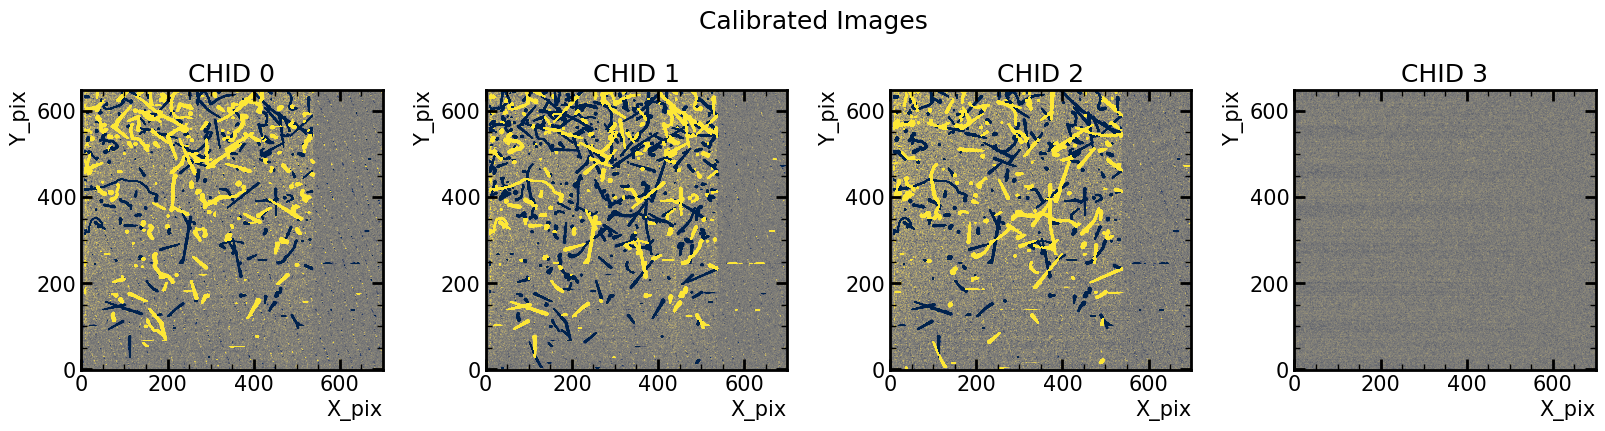

In [5]:
data_pre = precal(hdu_list,extensions=4)
gain, gain_err, data= LocalCalib(data_pre,extensions=4)
fig=plt.figure(figsize=(20,8))
for i in range(4):
    plt.subplot(2,4,i+1)
    plt.imshow(data[i],vmin=-1,vmax=1,cmap=mpl.cm.cividis)
    plt.title('CHID '+str(i))
    plt.ylabel('Y_pix')
    plt.xlabel('X_pix')
    print("CHID "+str(i)+' Gain:({:.2f} +- {:.2f})ADUs'.format(gain[i],gain_err[i]))
plt.suptitle('Calibrated Images')
#plt.savefig('IMAGES_POSCALIB.png', bbox_inches='tight', dpi=100)
    
plt.show()

Text(0, 1, 'Seg')

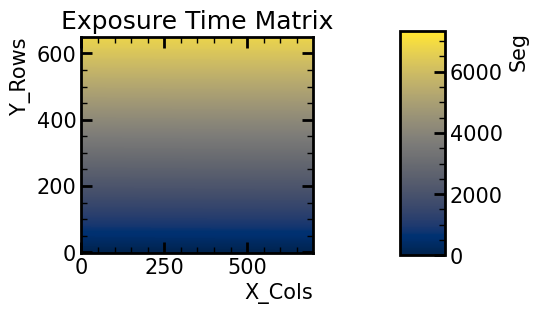

In [6]:
ExpoMatrix, Ttot, NRow, NCol, NSamp= totTime(path)
fig=plt.figure(figsize=(6,2.8))

plt.imshow(ExpoMatrix,cmap=mpl.cm.cividis,vmin=0,vmax=Ttot)#Ttot/3600)

plt.title('Exposure Time Matrix')
plt.ylabel('Y_Rows')
plt.xlabel('X_Cols')

cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.ylabel('Seg')
#ExpoMatrix
#Ttot

In [7]:
HEF, VEF = exposureFactor(path) #Exposure Factor in [s/pix]

HEF=0.01608351648352104 VEF=10.454285714285717


media on Row=0.03540909296518439, stdDev on y=0.038373892898817374
Check
media on Col=0.0366644209505122, stdDev on y=0.04490352884511365


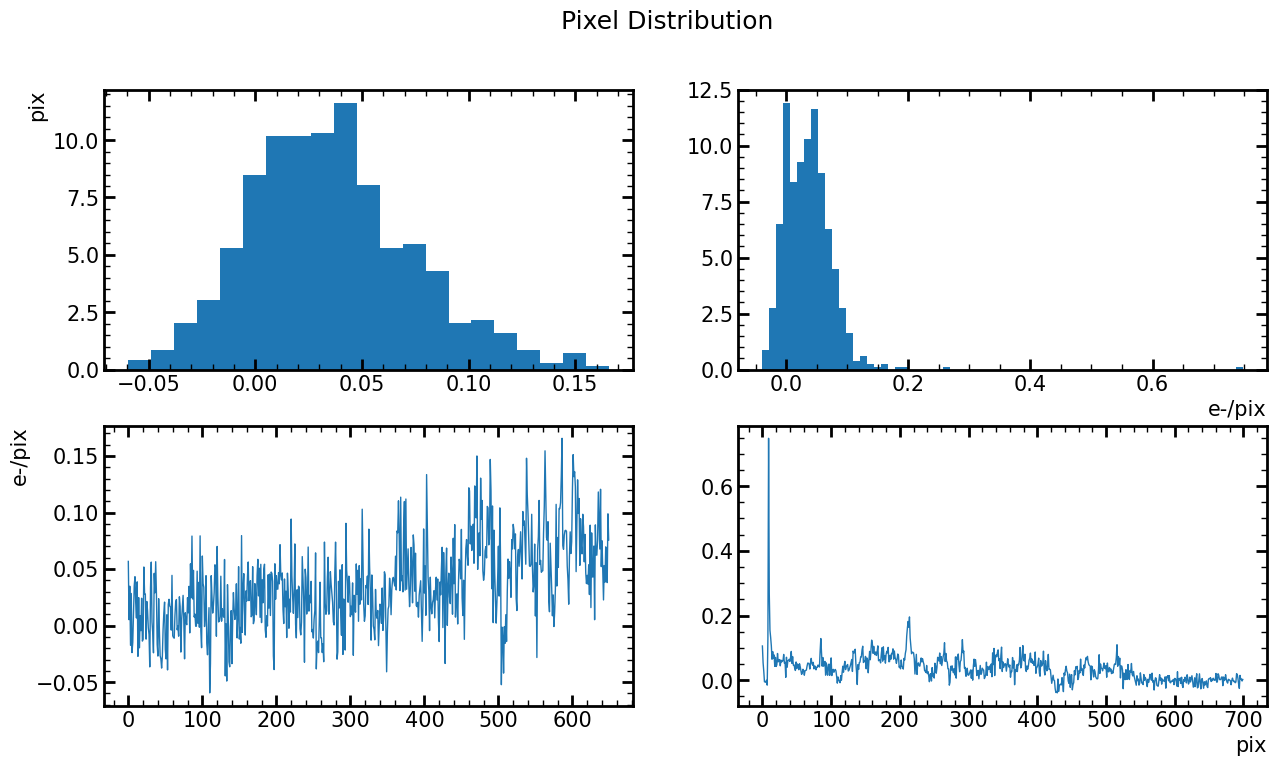

In [8]:
data_masked=data[0]

data_Row, data_Col, Row_bins, Col_bins, Row_hist, Col_hist = hist_RowColumn(data_masked)

fig_all, axs_all = plt.subplots(2, 2, figsize=(15, 8))		# Create figures

fig_all.suptitle('Pixel Distribution')

axs_all[0][0].hist(data_Row, Row_bins, density=True)

axs_all[0][1].hist(data_Col, Col_bins, density=True)

axs_all[1][0].plot(data_Row)

axs_all[1][1].plot(data_Col)

axs_all[0][0].set_ylabel('pix')
axs_all[1][0].set_ylabel('e-/pix')
axs_all[0][1].set_xlabel('e-/pix')
axs_all[1][1].set_xlabel('pix')

plt.show()


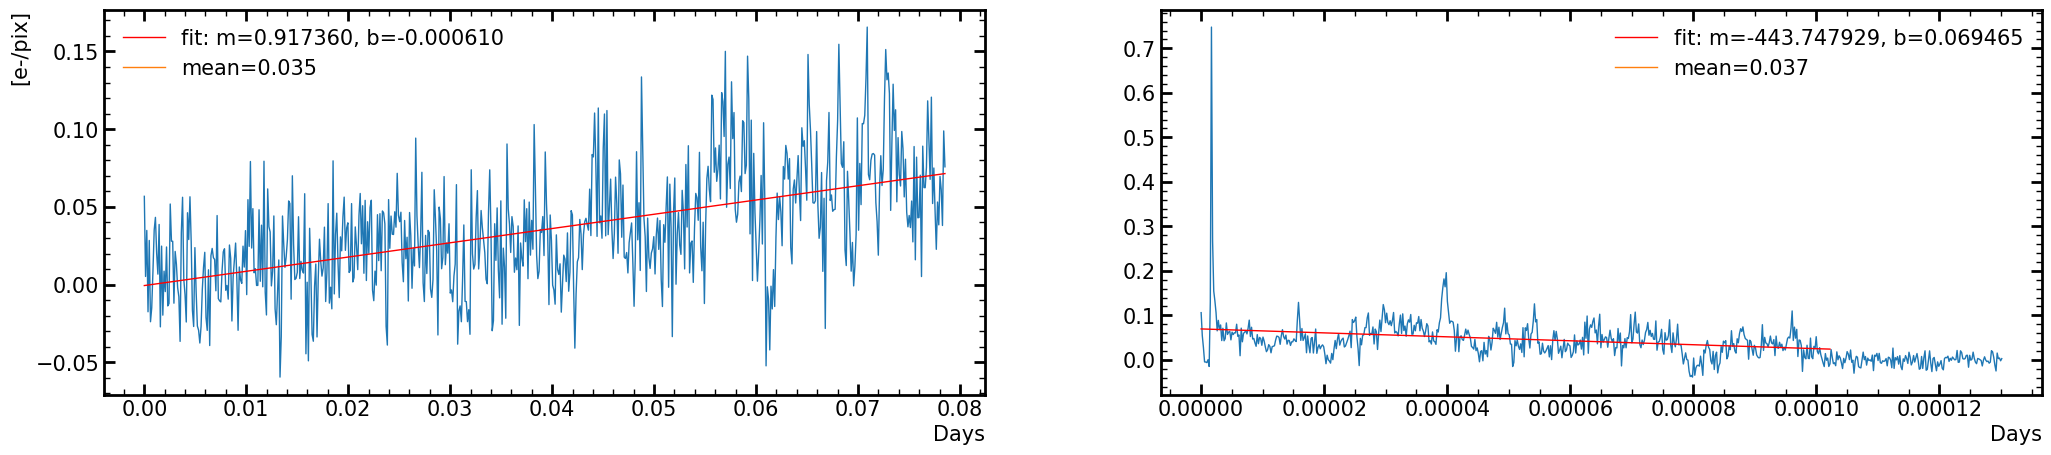

In [9]:
#NROW650_NCOL700
fig_all, axs_all = plt.subplots(1, 2, figsize=(25, 5))		# Create figures
x_data=[]
i=0

for value in data_Row:  
            x_data.append(i)
            i+=1
Xdata=np.array(x_data)*VEF[0]/86400

axs_all[0].plot(Xdata, data_Row) #Xdata[Pix]*VEF[S/Pix], data_Row[e-]*86400[s/day]/VEF[s/pix]
popt, pcov = curve_fit(line, Xdata, data_Row)
axs_all[0].plot(Xdata, line(Xdata, popt[0], popt[1]), 'r-', label='fit: m=%f, b=%f' % tuple(popt)) #plot de xdata vs f(xdata)
rowValues=popt
axs_all[0].plot(np.mean(data_Row), label="mean=%5.3f" % np.mean(data_Row) )
axs_all[0].set_ylabel('[e-/pix]')
axs_all[0].set_xlabel('Days')
axs_all[0].legend()

x_data=[]
i=0

for value in data_Col:  
            x_data.append(i)
            i+=1
Xdata=np.array(x_data)*HEF[0]/86400

axs_all[1].plot(Xdata, data_Col)
popt, pcov = curve_fit(line, Xdata[:550], data_Col[:550])
axs_all[1].plot(Xdata[:550], line(Xdata[:550], popt[0], popt[1]), 'r-', label='fit: m=%f, b=%f' % tuple(popt)) #plot de xdata vs f(xdata)
colValues=popt
axs_all[1].plot(np.mean(data_Col[:550]), label="mean=%5.3f" % np.mean(data_Col) )
axs_all[1].set_xlabel('Days')
axs_all[1].legend()

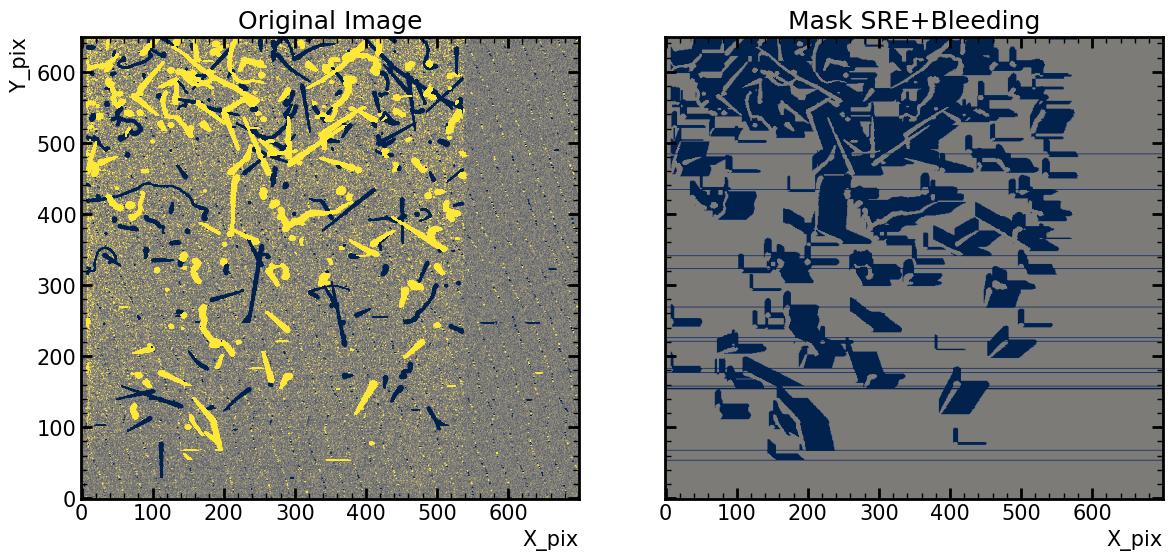

In [96]:
label=ndimage.label(data[0]>4,structure=[[1,1,1],[1,1,1],[1,1,1]])[0]

rps=sk.regionprops(label,intensity_image=data[0],cache=False, extra_properties=[sum_intensity])
areas=[r.area for r in rps]
energy=[r.sum_intensity for r in rps]
centr=[r.weighted_centroid for r in rps]
ecce=[r.eccentricity for r in rps]
dic_props={"areas":areas,"energias":energy,'centroid':centr, "excentricidade":ecce}

df=pd.DataFrame.from_dict(dic_props)
df.index = np.arange(1, len(df)+1)
# df.head(35) #show dataframe

energias=dic_props["energias"]
exce=dic_props["excentricidade"]
hee_list=np.where((np.array(energias)>80) & (np.array(exce)!=1))[0].tolist() #index od the dictionary of events ---> TRESHOLD OF 80 ELECTRONS TO BE HE

areas=dic_props["areas"]
see_list=np.where((np.array(exce)==1) & (np.array(areas)>9))[0].tolist() 
see_list

HE_events=np.zeros_like(label)
for event in hee_list:
    [x,y]=np.where(label==event+1)
    for i in range(len(x)):
        HE_events[x[i],y[i]]=1

SRE_events=np.zeros_like(label)
for event in see_list:
    [x,y]=np.where(label==event+1)
    for i in range(len(x)):
        SRE_events[x[i],y[i]]=1

mask_bleeding=ndimage.binary_dilation(HE_events>0,structure=[[0,0,0],[0,1,1],[0,0,0]],iterations=40)*1.0#-(HE_events>0)*1.0

maskV_bleeding=ndimage.binary_dilation(HE_events>0,structure=[[0,0,0],[0,1,0],[0,1,0]],iterations=20)*1.0#-(HE_events>0)*1.0

matriz2, dmask=no_sr(data[0]+((maskV_bleeding+mask_bleeding+HE_events))*-1e7,threshold=3,trem=20)

pre_sre=ndimage.label((data[0]+((maskV_bleeding+mask_bleeding+HE_events))*-1e7)>4,structure=[[0,0,0],[1,1,1],[0,0,0]])[0]

rps=sk.regionprops(pre_sre,cache=False)
areas=[r.area for r in rps]

SRE_events=np.zeros_like(pre_sre)
for event in np.where(np.array(areas)>1)[0].tolist():
    [x,y]=np.where(pre_sre==event+1)
    for i in range(len(x)):
        SRE_events[x[i],y[i]]=1

SRE_mask=np.zeros_like(SRE_events)
for y in np.unique(np.where(SRE_events==1)[0]).tolist(): SRE_mask[y,:]=1

rps=sk.regionprops(label,intensity_image=data[1],cache=False, extra_properties=[sum_intensity])
areas=[r.area for r in rps]
energy=[r.sum_intensity for r in rps]
centr=[r.weighted_centroid for r in rps]
ecce=[r.eccentricity for r in rps]
dic_props={"areas":areas,"energias":energy,'centroid':centr, "excentricidade":ecce}

flag0=[]
for i in range(len(centr)):
    if int(centr[i][0]) not in np.unique(np.where(SRE_events==1)[0]).tolist():
        
        flag0.append(i)

flag0_events=np.zeros_like(label)
for event in flag0:
    [x,y]=np.where(label==event+1)
    for i in range(len(x)):
        flag0_events[x[i],y[i]]=1

fig=plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('Original Image')
plt.imshow(data[0],vmin=-1,vmax=1,cmap=mpl.cm.cividis)
plt.ylabel('Y_pix')
plt.xlabel('X_pix')
plt.subplot(122)
plt.imshow(-(maskV_bleeding+mask_bleeding-2*HE_events+SRE_mask),vmin=-1,vmax=1,cmap=mpl.cm.cividis)

plt.title('Mask SRE+Bleeding')
plt.tick_params('y', labelleft=False)
plt.subplots_adjust(wspace=0.01)
plt.xlabel('X_pix')
# plt.savefig('Imageandmask.png', bbox_inches='tight', dpi=100)
plt.show()


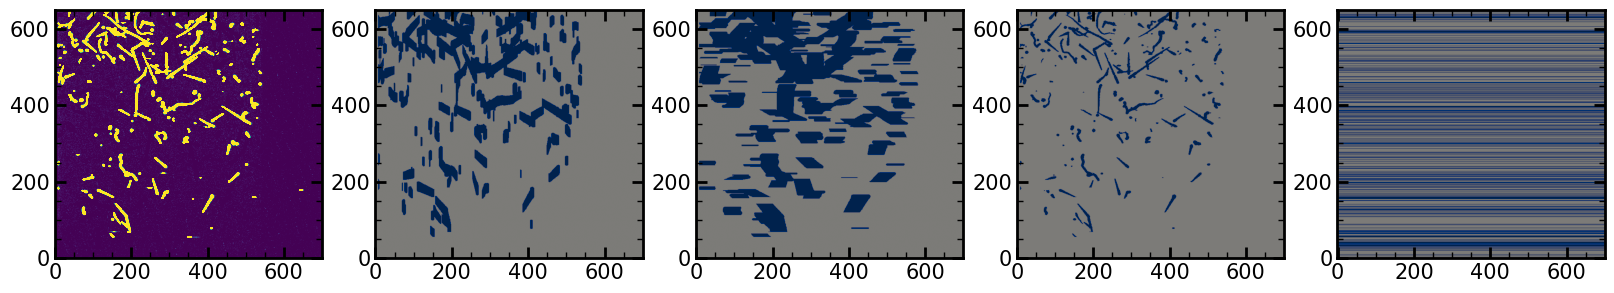

In [93]:
fig=plt.figure(figsize=(20,10))
plt.subplot(1,5,1)
plt.imshow(data[0],vmin=0,vmax=10)
plt.subplot(1,5,2)
plt.imshow(-(maskV_bleeding),vmin=-1,vmax=1,cmap=mpl.cm.cividis)
plt.subplot(1,5,3)
plt.imshow(-(mask_bleeding),vmin=-1,vmax=1,cmap=mpl.cm.cividis)
plt.subplot(1,5,4)
plt.imshow(-(HE_events),vmin=-1,vmax=1,cmap=mpl.cm.cividis)
plt.subplot(1,5,5)
plt.imshow(-(SRE_mask),vmin=-1,vmax=1,cmap=mpl.cm.cividis)


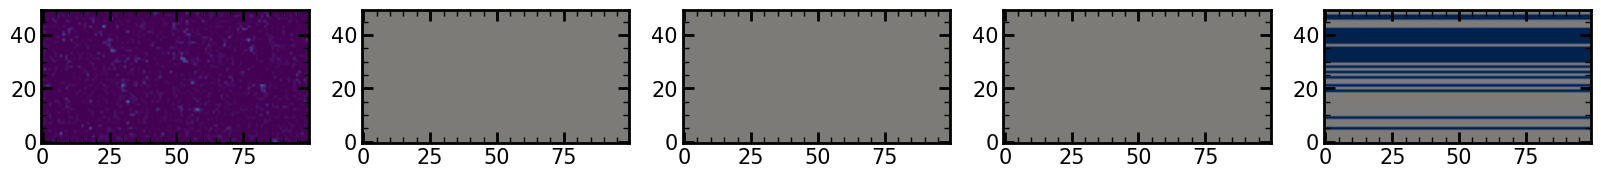

In [94]:
fig=plt.figure(figsize=(20,10))
plt.subplot(1,5,1)
plt.imshow(data[0][:50,:100],vmin=0,vmax=10)
plt.subplot(1,5,2)
plt.imshow(-(maskV_bleeding)[:50,:100],vmin=-1,vmax=1,cmap=mpl.cm.cividis)
plt.subplot(1,5,3)
plt.imshow(-(mask_bleeding[:50,:100]),vmin=-1,vmax=1,cmap=mpl.cm.cividis)
plt.subplot(1,5,4)
plt.imshow(-(HE_events[:50,:100]),vmin=-1,vmax=1,cmap=mpl.cm.cividis)
plt.subplot(1,5,5)
plt.imshow(-(SRE_mask[:50,:100]),vmin=-1,vmax=1,cmap=mpl.cm.cividis)

In [87]:
label=ndimage.label(data[0][0:50,300:400]>4,structure=[[0,0,0],[1,1,1],[0,0,0]])[0]

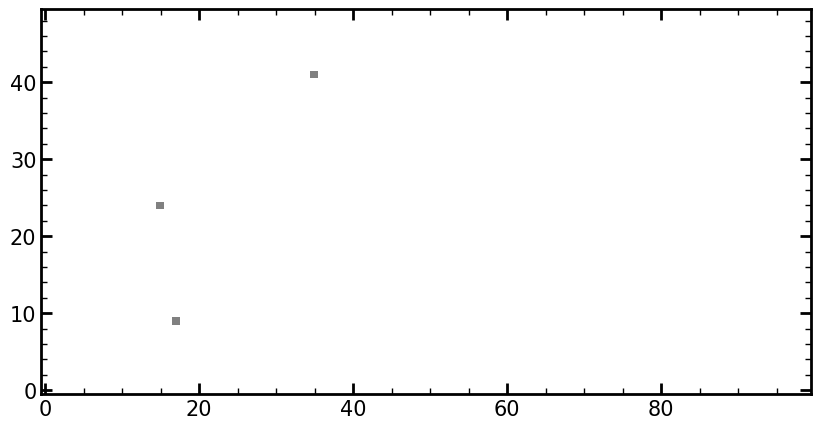

In [88]:
plt.figure(figsize=(15,5))
plt.imshow(label==0, cmap='gray', vmax=1,vmin=-1)
plt.show()

In [11]:
event_mask=maskV_bleeding+mask_bleeding
event_halo_mask = ndimage.binary_dilation(
        event_mask>0,
        iterations = 10,
        structure = ndimage.generate_binary_structure(rank=2, connectivity=2) # == [[1,1,1],[1,1,1],[1,1,1]]
    )
event_halo_SR_mask = np.array(SRE_mask,dtype=bool)|event_halo_mask

In [12]:
# fig=plt.figure(figsize=(10,8))
# plt.subplot(121)
# #plt.imshow(data[0]*event_halo_SR_mask,vmin=-1,vmax=1,cmap=mpl.cm.cividis) #plt.imshow(data[0]-1e7*event_halo_SR_mask,vmin=-1,vmax=1,cmap=mpl.cm.cividis)
# plt.imshow(ma.masked_array(data[0], mask=(mask_bleeding)),vmin=-1,vmax=1)#[0:699,550:649]
# plt.ylabel('Y_pix')
# plt.xlabel('X_pix')
# plt.title('SRE+Bleeding Mask+ Bleeding Halo')
# plt.subplot(122)
# plt.imshow(ma.masked_array(data[0], mask=(event_halo_SR_mask)),vmin=-1,vmax=1)
# #plt.savefig('SER.png', bbox_inches='tight', dpi=100)
# plt.show()

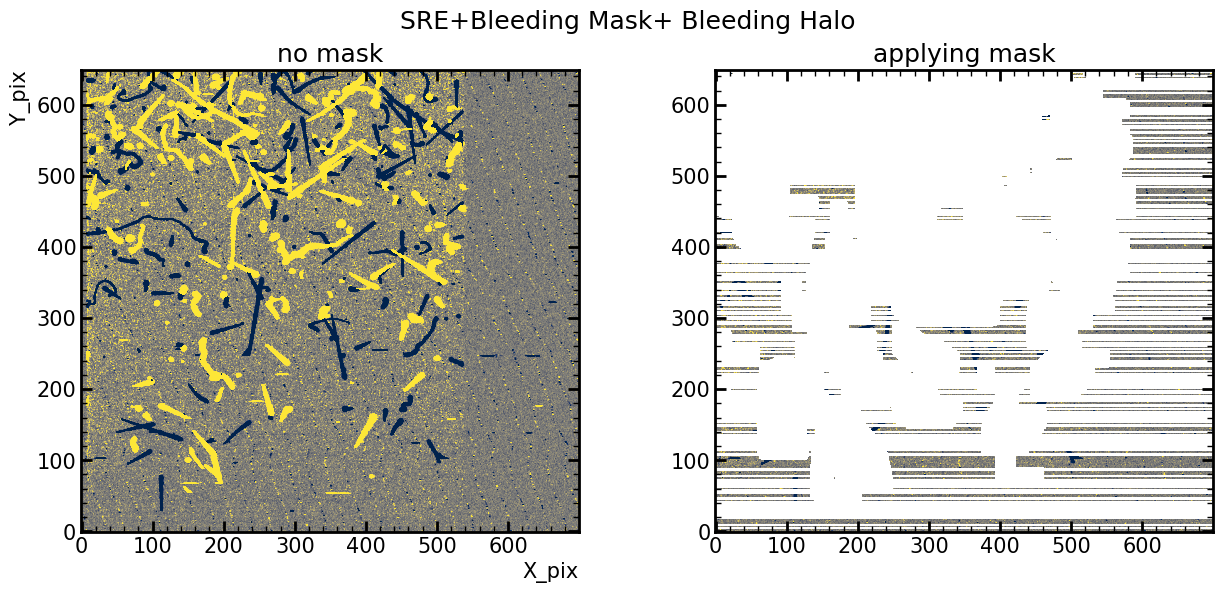

In [13]:
data_masked=ma.masked_array(data[0], mask=(event_halo_SR_mask))#[0:699,500:599]

fig=plt.figure(figsize=(15,6))
fig.suptitle('SRE+Bleeding Mask+ Bleeding Halo')
plt.subplot(121)
plt.title('no mask')
#plt.imshow(data[0]*event_halo_SR_mask,vmin=-1,vmax=1,cmap=mpl.cm.cividis) #plt.imshow(data[0]-1e7*event_halo_SR_mask,vmin=-1,vmax=1,cmap=mpl.cm.cividis)
plt.imshow(data[0],vmin=-1,vmax=1,cmap=mpl.cm.cividis)#[0:699,550:649]
plt.ylabel('Y_pix')
plt.xlabel('X_pix')

plt.subplot(122)
plt.title('applying mask')
plt.imshow(ma.masked_array(data[0], mask=(event_halo_SR_mask)),vmin=-1,vmax=1,cmap=mpl.cm.cividis)
#plt.savefig('SER.png', bbox_inches='tight', dpi=100)
plt.show()


In [14]:
  

data_Row_masked, data_Col_masked, Row_bins_masked, Col_bins_masked, Row_hist_masked, Col_hist_masked = hist_RowColumn(data_masked)

media on Row=0.0029126453337773497, stdDev on y=0.02150318540655283
Check
media on Col=0.004745208921090877, stdDev on y=0.04103845341663118


In [15]:
data_Col_masked.shape

(700,)

Text(1, 0, 'pix')

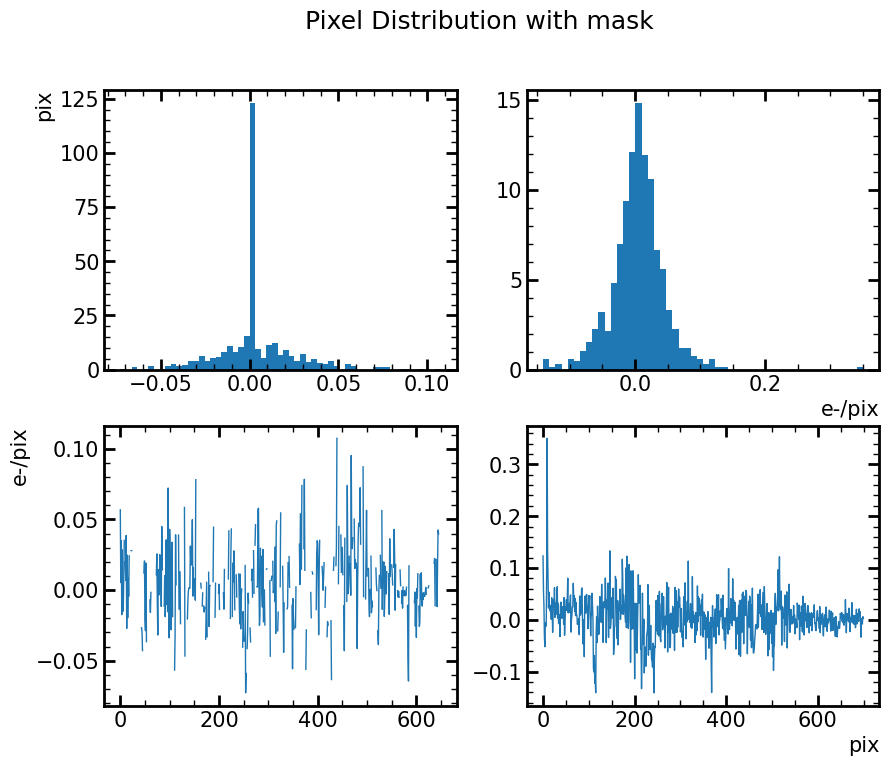

In [16]:


fig_all, axs_all = plt.subplots(2, 2, figsize=(10, 8))		# Create figures

fig_all.suptitle('Pixel Distribution with mask')

axs_all[0][0].hist(data_Row_masked, Row_bins_masked, density=True)

axs_all[0][1].hist(data_Col_masked, Col_bins_masked, density=True)

axs_all[1][0].plot(data_Row_masked)

axs_all[1][1].plot(data_Col_masked)

axs_all[1][0].set_ylabel('e-/pix')
axs_all[0][1].set_xlabel('e-/pix')
axs_all[0][0].set_ylabel('pix')
axs_all[1][1].set_xlabel('pix')

# plt.show()

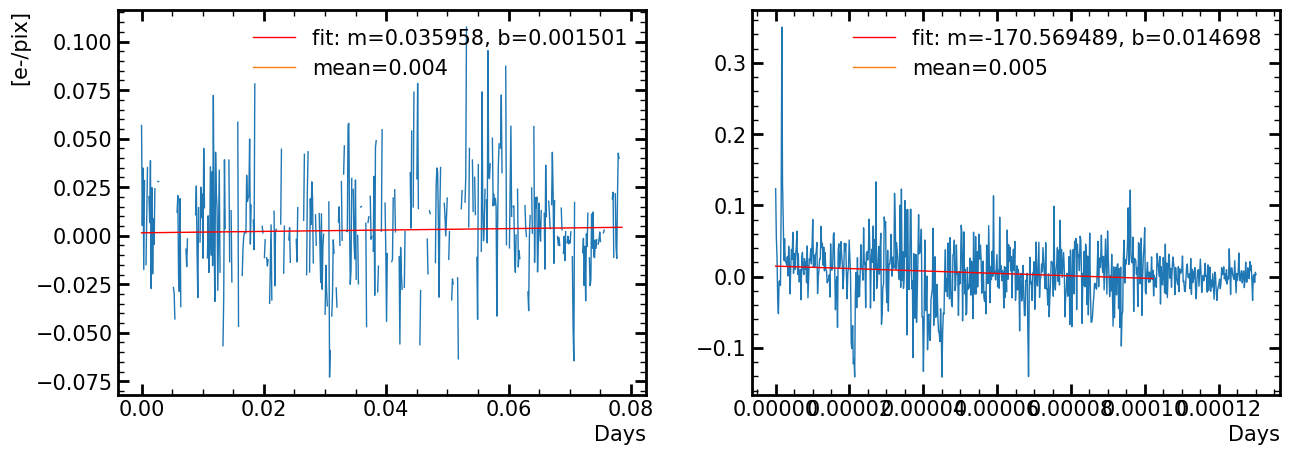

In [17]:
#NROW650_NCOL700
fig_all, axs_all = plt.subplots(1, 2, figsize=(15, 5))		# Create figures
x_data=[]
i=0

for value in data_Row_masked:  
            x_data.append(i)
            i+=1
Xdata=np.array(x_data)*VEF[0]/86400

axs_all[0].plot(Xdata, data_Row_masked) #Xdata[Pix]*VEF[S/Pix], data_Row[e-]*86400[s/day]/VEF[s/pix]
popt, pcov = curve_fit(line, Xdata, data_Row_masked)
axs_all[0].plot(Xdata, line(Xdata, popt[0], popt[1]), 'r-', label='fit: m=%f, b=%f' % tuple(popt)) #plot de xdata vs f(xdata)
rowValues=popt
axs_all[0].plot(np.mean(data_Row_masked), label="mean=%5.3f" % np.mean(data_Row_masked) )
axs_all[0].set_ylabel('[e-/pix]')
axs_all[0].set_xlabel('Days')
axs_all[0].legend()

x_data=[]
i=0

for value in data_Col_masked:  
            x_data.append(i)
            i+=1
Xdata=np.array(x_data)*HEF[0]/86400

axs_all[1].plot(Xdata, data_Col_masked)
popt, pcov = curve_fit(line, Xdata[:550], data_Col_masked[:550])
axs_all[1].plot(Xdata[:550], line(Xdata[:550], popt[0], popt[1]), 'r-', label='fit: m=%f, b=%f' % tuple(popt)) #plot de xdata vs f(xdata)
colValues=popt
axs_all[1].plot(np.mean(data_Col_masked[:550]), label="mean=%5.3f" % np.mean(data_Col_masked) )
axs_all[1].set_xlabel('Days')
axs_all[1].legend()

In [18]:
dataframe=pd.read_csv('/home/oem/Software/cursoInstrumentacion_2022/datos_mean_28Feb.csv',sep=',')

In [19]:
dataframe.sort_values(by='SlopeMasked')

File  Temp     Slope  SlopeMasked
8   img71   140 -0.286124    -0.307752
12  img49   140 -0.482932    -0.265749
10  img53   140 -0.322539    -0.194366
14  img27   140 -0.089377    -0.182997
30  img33   140 -0.304505    -0.170851
31  img75   140 -0.266148    -0.163899
23  img77   140 -0.107320    -0.161507
13  img79   140 -0.533378    -0.154812
24  img19   140  2.921803    -0.151774
26  img45   140  0.172086    -0.149097
9   img31   140 -0.535086    -0.142449
22  img13   140 -0.111756    -0.108891
2   img17   140  0.187408    -0.092396
25  img15   140 -0.910879    -0.087556
21  img51   140 -0.313370    -0.084839
27  img59   140  1.856240    -0.071797
7   img47   140  0.032549    -0.063845
19  img61   140  2.485939    -0.053710
0   img11   140 -0.367239    -0.049611
29  img21   140  1.543255    -0.044978
34  img73   140  0.276541    -0.040910
1   img39   140  3.276316    -0.038528
17  img35   140 -0.023174    -0.036961
3   img69   140 -0.110546    -0.035281
28  img29   140  0.073160    -0.015832
5   img57   140  1.339350     0.011208
16  img55   140  0.540636     0.013528
33  img65   140  1.520720     0.019379
6   img43   140 -0.291344     0.020560
18  img23   140  0.917360     0.035958
15  img25   140 -0.064942     0.047519
11  img37   140 -0.440596     0.057245
20  img67   140 -0.859306     0.077134
4   img41   140  0.223129     0.090443
32  img63   140  1.273698     0.112331

<AxesSubplot:xlabel='File', ylabel='Slope'>

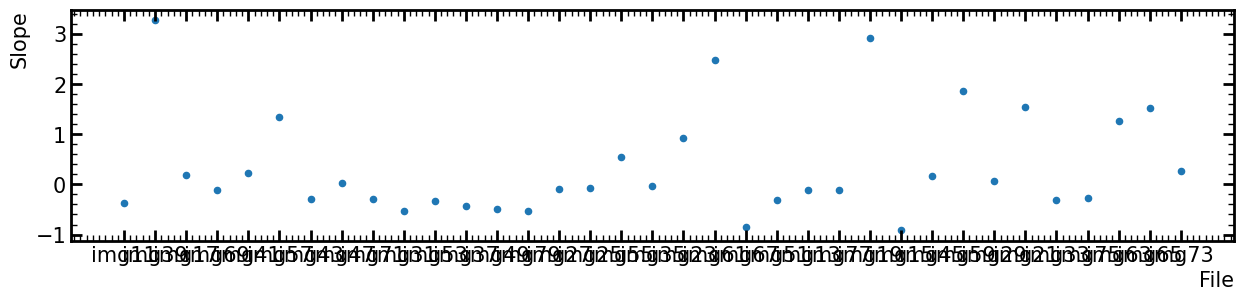

In [20]:
dataframe.plot(kind='scatter',x='File',y='Slope', figsize=[15,3])

<AxesSubplot:xlabel='File', ylabel='SlopeMasked'>

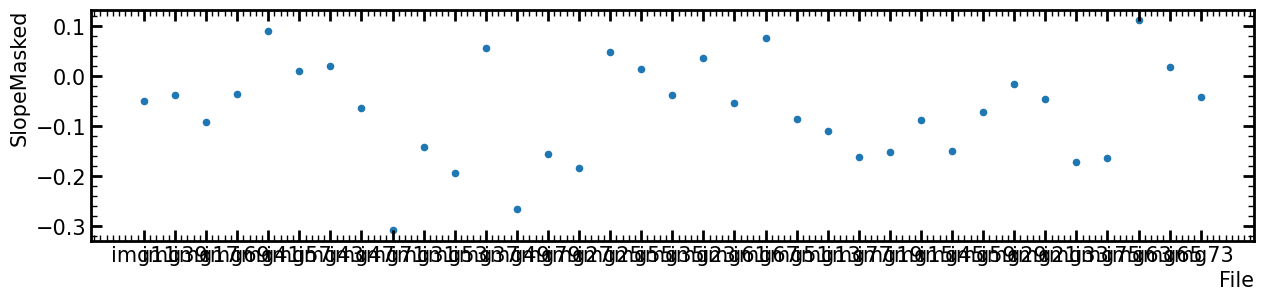

In [21]:
dataframe.plot(kind='scatter',x='File',y='SlopeMasked', figsize=[15,3])

<AxesSubplot:xlabel='Temp', ylabel='Slope'>

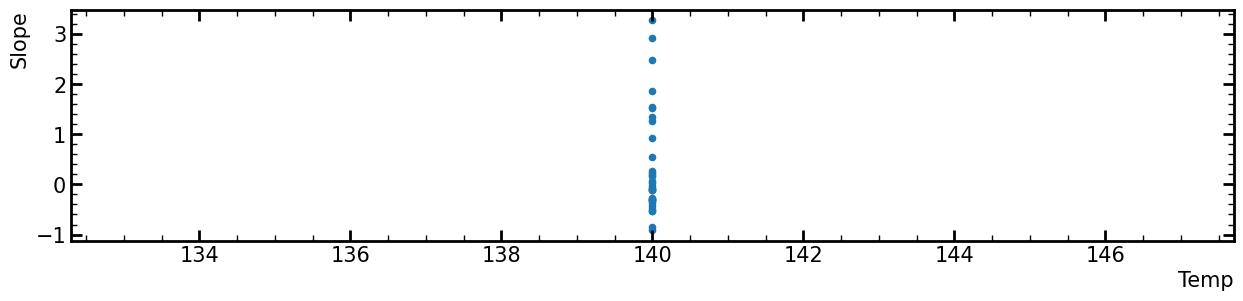

In [22]:
dataframe.plot(kind='scatter',x='Temp',y='Slope', figsize=[15,3])

<AxesSubplot:xlabel='Temp', ylabel='SlopeMasked'>

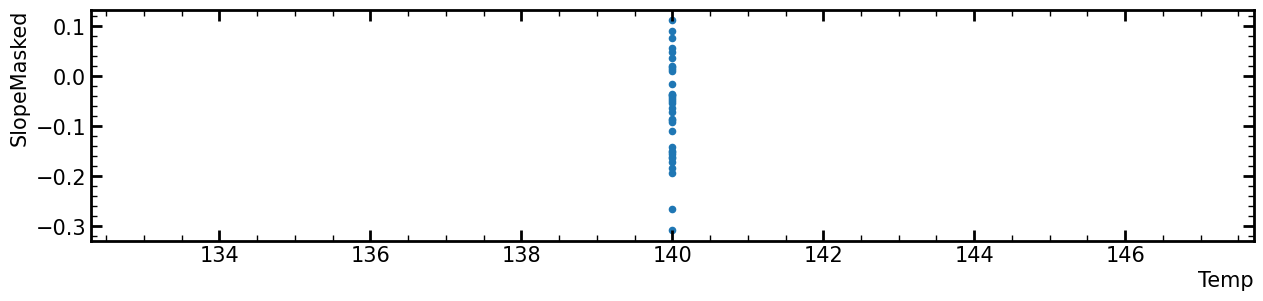

In [23]:
dataframe.plot(kind='scatter',x='Temp',y='SlopeMasked', figsize=[15,3])

# Ruido las imagenes 

![Perrito bonito](/home/oem/Software/cursoInstrumentacion_2022/ClasesPy/70%20-%20ICN_LabDet/T140.png)


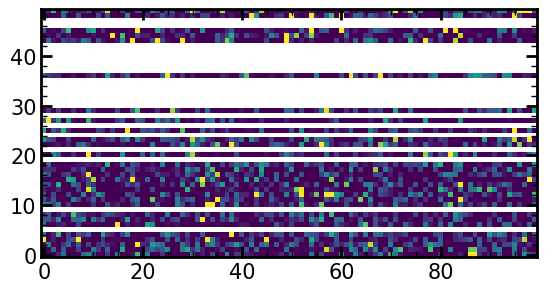

In [30]:
plt.imshow(data_masked[:50,:100], vmin=0, vmax=1)